In [60]:
# System imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
from string import digits
from numpy import array
import csv
import json
import numpy as np
import dateparser
import panel as pn
import matplotlib.ticker as tkr

plt.style.use('seaborn-white')


pn.extension()

%matplotlib inline


In [61]:
# Local imports
import sys
sys.path.append("../lib2")

from Constants import Constants
from ProcessingTools import DateProcessingTools


In [62]:
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)


In [63]:
# Construct the tools
debug_level = 0
constants = Constants()
tool_data_processing = DateProcessingTools(debug_level)


In [64]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)


In [65]:
atlas = atlas.sort_values(by='Invoice Date')

In [66]:
atlas.reset_index(inplace=True)

In [67]:
yearly_income = atlas.iloc[:, [0, 6, 4]]

In [68]:
grp_yearly_income = yearly_income.groupby('Year').sum()

In [69]:
grp_yearly_income['Invoice Amount'] = grp_yearly_income['Invoice Amount'] / 1000

In [70]:
 grp_yearly_income.hvplot(
     y='Invoice Amount',
     figsize=(20,15), 
     kind='bar', 
     subplots=True, 
     title=('Total Sales by Year from 2015 to 2020'), 
     ylabel='Yearly Income (Tounsands of Dollars)', 
     xlabel='Total Number of Years',
     height=600,
     grid=True,
     width=1200).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 18, 'yticks': 20})

:Bars   [Year]   (Invoice Amount)

In [71]:
grp_yearly_income.hvplot(kind='table')

:Table   [Invoice Amount]

In [72]:
monthly_income = atlas.iloc[:, [0, 5, 6, 2, 4]]
monthly_income.sort_values(by='Invoice Date')

,Customers,Month,Invoice Amount,Invoice Date,Year
0,University 1,March,72000.0,2015-03-20 00:00:00-04:00,2015
1,University 2,May,3500.0,2015-05-28 00:00:00-04:00,2015
2,University 3,June,3500.0,2015-06-23 00:00:00-04:00,2015
3,University 4,June,6500.0,2015-06-26 00:00:00-04:00,2015
4,University 5,October,750.0,2015-10-07 00:00:00-04:00,2015
...,...,...,...,...,...
697,University 236,December,2500.0,2020-12-08 00:00:00-05:00,2020
698,University 392,December,1000.0,2020-12-08 00:00:00-05:00,2020
695,University 300,December,1750.0,2020-12-08 00:00:00-05:00,2020
696,University 81,December,2000.0,2020-12-08 00:00:00-05:00,2020


In [73]:
month_names = [ "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December" ]
grp_monthly_income = monthly_income[ (monthly_income["Year"] >= 2015) & (monthly_income["Year"] <= 2019) ].groupby('Month').sum().reindex(month_names)
grp_monthly_income_plt = grp_monthly_income.hvplot.area(
    y='Invoice Amount',
    title='Total Sales by Month from 2015 to 2019', 
    ylabel='Monthly Income', 
    xlabel='Months', 
    figsize=(20,15), 
    subplots=True,
    color='Orange',
    height=800,
    grid=True,
    rot=45,
    width=1400).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 18, 'yticks': 20})

In [74]:
grp_monthly_income.hvplot.table()

:Table   [Invoice Amount,Year]

In [75]:
month_names = [ "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December" ]
grp_monthly_income = monthly_income[ (monthly_income["Year"] >= 2015) & (monthly_income["Year"] <= 2020) ].groupby('Month').sum().reindex(month_names)
grp_monthly_income_plt_3 = grp_monthly_income.hvplot.area(
    y='Invoice Amount',
    title='Total Sales Comparison between 2015-2019 VS. 2020', 
    ylabel='Average Monthly Income', 
    xlabel='Months', 
    figsize=(20,15), 
    subplots=True, 
    height=800,
    grid=True,
    rot=45,
    width=1400).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 18, 'yticks': 20})

In [76]:
combined_income = grp_monthly_income_plt_3 * grp_monthly_income_plt
combined_income

:Overlay
   .Area.I  :Area   [Month]   (Invoice Amount)
   .Area.II :Area   [Month]   (Invoice Amount)

In [77]:
grp_monthly_income.hvplot(kind='table')

:Table   [Invoice Amount,Year]

In [78]:
subscription_income = atlas.iloc[:, [0, 6, 7, 2]]
subscription_income.sort_values(by='Invoice Date')

,Customers,Invoice Amount,Subscription,Invoice Date
0,University 1,72000.0,1 Year,2015-03-20 00:00:00-04:00
1,University 2,3500.0,1 Year,2015-05-28 00:00:00-04:00
2,University 3,3500.0,1 Year,2015-06-23 00:00:00-04:00
3,University 4,6500.0,1 Year,2015-06-26 00:00:00-04:00
4,University 5,750.0,1 Year,2015-10-07 00:00:00-04:00
...,...,...,...,...
697,University 236,2500.0,6 Months,2020-12-08 00:00:00-05:00
698,University 392,1000.0,1 Year,2020-12-08 00:00:00-05:00
695,University 300,1750.0,6 Months,2020-12-08 00:00:00-05:00
696,University 81,2000.0,1 Year,2020-12-08 00:00:00-05:00


In [79]:
month_names = [ "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December" ]
grp_monthly_income = monthly_income[ (monthly_income["Year"] >= 2015) & (monthly_income["Year"] <= 2020) ].groupby('Month').sum().reindex(month_names)
grp_monthly_income_plt_3 = grp_monthly_income.hvplot.bar(
    y='Invoice Amount',
    title='Busiest Months of the Year for Sales from 2015 to 2020',
    color='Orange',
    ylabel='Average Monthly Income', 
    xlabel='Months', 
    figsize=(20,15), 
    subplots=True, 
    height=800,
    grid=True,
    rot=45,
    width=1400).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 18, 'yticks': 20})
grp_monthly_income_plt_3

:Bars   [Month]   (Invoice Amount)

In [80]:
grp_monthly_income.hvplot.table()

:Table   [Invoice Amount,Year]

In [81]:
subscription_types = subscription_income.groupby(['Subscription']).sum()
subscription_type = subscription_types.sort_values(by="Invoice Amount", ascending=False).head(10)
subscription_type = subscription_type.reset_index()

In [82]:
subscription_type['Invoice Amount'] = subscription_type['Invoice Amount'] / 1000

In [83]:
# Plotting the data from the subscription type
subscription_type.hvplot.bar(
    x="Subscription", 
    y="Invoice Amount", 
    xlabel = "Subscription Types",
    ylabel = "Total Sales by Subscription (Tounsands of Dollars)",
    title="Total Income by Subscription Type from 2015 to 2020", 
    figsize=(20,15), 
    subplots=True, 
    height=800,
    grid=True,
    width=1400).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 18, 'yticks': 20})

:Bars   [Subscription]   (Invoice Amount)

In [84]:
subscription_type.hvplot.table()

:Table   [Subscription,Invoice Amount]

In [85]:
new_customers = atlas.iloc[:, [0, 2, 6, 9]]

In [86]:
Group_Customers = new_customers.groupby(['Customers']).sum()
TOP_10_Highest = Group_Customers.sort_values(by="Invoice Amount", ascending=False).head(10)
TOP_10_Highest = TOP_10_Highest.reset_index()

In [87]:
# Plotting the data from the top 10 Highest Customers
TOP_10_Highest.hvplot.bar(
    x="Customers", 
    y="Invoice Amount", 
    xlabel = "Highest Paying Customers",
    ylabel = "Total Sales",
    title="Top 10 Highest Paying Customers of All Time out of 392 Customers", 
    figsize=(20,15), 
    subplots=True, 
    height=900,
    grid=True,
    rot=45,
    width=1400).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 18, 'yticks': 20})

:Bars   [Customers]   (Invoice Amount)

In [88]:
TOP_10_Highest.hvplot.table()

:Table   [Customers,Invoice Amount]

In [89]:
Group_Customers_2 = new_customers.groupby(['Customers']).sum()
TOP_10_Lowest = Group_Customers_2.sort_values(by="Invoice Amount", ascending=True).head(10)
TOP_10_Lowest = TOP_10_Lowest.reset_index()

In [90]:
# Plotting the data from the top 10 Lowest Customers
TOP_10_Lowest.hvplot.bar(
    x="Customers", 
    y="Invoice Amount", 
    xlabel = "Lowest Paying Customers",
    ylabel = "Total Sales",
    title="Top 10 Lowest Paying Customers of All Time out of 392 Customers", 
    figsize=(20,15), 
    subplots=True, 
    height=800,
    grid=True,
    rot=45,
    width=1400).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 18, 'yticks': 20})

:Bars   [Customers]   (Invoice Amount)

In [91]:
TOP_10_Lowest.hvplot.table()

:Table   [Customers,Invoice Amount]

In [92]:
customers_states = atlas.loc[:, ['Customers', 'Invoice Date', 'Invoice Amount', 'State']]
customers_states

,Customers,Invoice Date,Invoice Amount,State
0,University 1,2015-03-20 00:00:00-04:00,72000.0,LA
1,University 2,2015-05-28 00:00:00-04:00,3500.0,KS
2,University 3,2015-06-23 00:00:00-04:00,3500.0,KY
3,University 4,2015-06-26 00:00:00-04:00,6500.0,NY
4,University 5,2015-10-07 00:00:00-04:00,750.0,MD
...,...,...,...,...
695,University 300,2020-12-08 00:00:00-05:00,1750.0,CA
696,University 81,2020-12-08 00:00:00-05:00,2000.0,NC
697,University 236,2020-12-08 00:00:00-05:00,2500.0,Canada
698,University 392,2020-12-08 00:00:00-05:00,1000.0,MA


In [93]:
# Highest Income by State
top10payingstates = customers_states.reset_index().groupby("State").sum()["Invoice Amount"].nlargest(11)
top10payingstates.hvplot.bar(
    title="Top 10 Highest Paying States of All Time out of 50 States", 
    xlabel="States", 
    ylabel="Total Invoiced ($)",
    figsize=(20,15), 
    subplots=True, 
    height=800,
    grid=True,
    width=1400).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 25, 'yticks': 20})

:Bars   [State]   (Invoice Amount)

In [94]:
top10payingstates.hvplot.table()

:Table   [Invoice Amount]

In [95]:
# Lowest Income by State
top10lowpayingstates = customers_states.reset_index().groupby("State").sum()["Invoice Amount"].nsmallest(11)
top10lowpayingstates.hvplot.bar(
    title="Top 10 Lowest Paying States of All Time out of 50 States", 
    xlabel="States", 
    ylabel="Total Invoiced ($)",
    figsize=(20,15), 
    subplots=True, 
    height=800,
    grid=True,
    width=1400).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 25, 'yticks': 20})

:Bars   [State]   (Invoice Amount)

In [96]:
top10lowpayingstates.hvplot.table()

:Table   [Invoice Amount]

In [97]:
# Functions

import pandas as pd
import plotly as px
import hvplot.pandas
import matplotlib.pyplot as plt
import panel as pn
import plotly.express as px

def generate_plot__px_bar(
    data, x, y, color,                  # Data
    title, xlabel=None, ylabel=None,    # Labels
    barmode=None, width=None, height=None, rot=None    # Display options
    ):

    # Defaults
    if barmode is None:
        barmode="stack"

    # Build plot
    plt_ = px.bar(
        data, x=x, y=y, color=color,
        title=title,
        barmode=barmode
        )
    
    # Optional parameters
    if xlabel is not None:
        plt_.update_xaxes(title_text=xlabel)
    if ylabel is not None:
        plt_.update_yaxes(title_text=ylabel)

    if width is not None:
        plt_.update_layout(width=width)
    if height is not None:
        plt_.update_layout(height=height)
    if rot is not None:
        plt_.update_xaxes(tickangle=rot)

    # plt_.update_layout(
    #     margin=dict(l=20, r=20, t=20, b=20),
    #     paper_bgcolor="LightSteelBlue",
    # )

    return plt_

def generate_plot__hvplot_bar(
    data,                  # Data
    title, xlabel, ylabel,    # Labels
    stacked=False, rot=0, width=None, height=None, yformatter="%f"    # Display options
    ):

    # Defaults


    # Build plot
    if (width is not None) and (height is not None):
        plt_ = data.hvplot.bar(
            title=title, xlabel=xlabel, ylabel=ylabel,
            stacked=stacked, width=width, height=height, rot=rot
            ).opts(yformatter=yformatter)
    else:
        plt_ = data.hvplot.bar(
            title=title, xlabel=xlabel, ylabel=ylabel,
            stacked=stacked, rot=rot
            ).opts(yformatter=yformatter)

    return plt_
    
def generate_plot__hvplot_line(
    data,                  # Data
    title, xlabel, ylabel,    # Labels
    rot=0, width=None, height=None, yformatter="%f"    # Display options
    ):


    # Build plot
    if (width is not None) and (height is not None):
        plt_ = data.hvplot.line(
            title=title, xlabel=xlabel, ylabel=ylabel,
            width=width, height=height, rot=rot
            ).opts(yformatter=yformatter)
    else:
        plt_ = data.hvplot.line(
            title=title, xlabel=xlabel, ylabel=ylabel,
            rot=rot
            ).opts(yformatter=yformatter)

    return plt_


In [98]:
customers_subscriptions = atlas.loc[:, ['Customers', 'Invoice Date', 'Invoice Amount', 'Year', 'Subscription', 'Number of Users']]

In [99]:
invoice_data_by_service_start = customers_subscriptions.copy().reset_index().set_index("Invoice Date").sort_index(ascending=True)


# Subscription quantity per subscription type
atlas_grouped__year_subscription__mean  = invoice_data_by_service_start.groupby(["Year", "Subscription"]).mean()
atlas_grouped__year_subscription__sum   = invoice_data_by_service_start.groupby(["Year", "Subscription"]).sum()
atlas_grouped__year_subscription__count = invoice_data_by_service_start.groupby(["Year", "Subscription"]).count()

plt__atlas_grouped__year_subscription__mean = generate_plot__px_bar(
    data=atlas_grouped__year_subscription__mean.reset_index(),
    x="Year",
    y="Invoice Amount",
    color="Subscription",
    title="Avgerage of Sales and User Accounts: 2015 - 2020",
    xlabel="Number of Year",
    ylabel="Sale Amount over Number of Users",
    barmode="group", width=1000, height=600
    )

plt__atlas_grouped__year_subscription__sum = generate_plot__px_bar(
    data=atlas_grouped__year_subscription__sum.reset_index(),
    x="Year",
    y="Invoice Amount",
    color="Subscription",
    title="Total Invoice Amount per Subscription: 2015 - 2020",
    xlabel="Number of Years",
    ylabel="Total Sales of ATLAS Subscription",
    barmode="group", width=1000, height=600
    )

plt__atlas_grouped__year_subscription__count = generate_plot__px_bar(
    data=atlas_grouped__year_subscription__count.reset_index(),
    x="Year",
    y="Invoice Amount",
    color="Subscription",
    title="Total Number of Invoices per Subscription: 2015 - 2020",
    xlabel="Number of Years",
    ylabel="Total Number of Invoices Submitted",
    barmode="group", width=1000, height=600
    )

plt__atlas_grouped__year_subscription__nbrusers = generate_plot__px_bar(
    data=atlas_grouped__year_subscription__sum.reset_index(),
    x="Year",
    y="Number of Users",
    color="Subscription",
    title="Total Number of ATLAS Subscribers per Subscription: 2015 - 2020",
    xlabel="Number of Years",
    ylabel="Total Number of ATLAS Subscribers",
    barmode="group", width=1000, height=600
    )

pn.Column(
    plt__atlas_grouped__year_subscription__mean.show(),
    plt__atlas_grouped__year_subscription__sum.show(),
    plt__atlas_grouped__year_subscription__count.show(),
    plt__atlas_grouped__year_subscription__nbrusers.show()
)



# plt__atlas_grouped__year_subscription__count.show()

# .plot.pie(x="Customers", y="Invoice Amount", figsize=(8, 8))


# TODO Subscription count per subscription type

# TODO hvplot forall

# TODO use new data (removes 18months 5months)


Column
    [0] Str(None)
    [1] Str(None)
    [2] Str(None)
    [3] Str(None)

In [100]:
customers_status_1 = atlas.loc[:, ['Customers', 'Invoice Date', 'Number of Users', 'Year', 'Customers Status']]

In [101]:
atlas_grouped__year_subscription__count.hvplot.table()

:Table   [Year,Subscription,index,Customers,Invoice Amount,Number of Users]

In [102]:
invoice_data_by_service_start_1 = customers_status_1.copy().reset_index().set_index("Invoice Date").sort_index(ascending=True)


# Subscription quantity per subscription type

atlas_grouped__year_subscription__count_1 = invoice_data_by_service_start_1.groupby(["Year", "Customers Status"]).count()


plt__atlas_grouped__year_subscription__count_1 = generate_plot__px_bar(
    data=atlas_grouped__year_subscription__count_1.reset_index(),
    x="Year",
    y="Number of Users",
    color="Customers Status",
    title="Customers Status based on Activities: 2015 - 2020",
    xlabel="Year",
    ylabel="Total Number of Customers",
    barmode="group", width=1000, height=800
    )

plt__atlas_grouped__year_subscription__count_1.show()

In [126]:
atlas

,Customers,Number of Users,Invoice Date,Invoice #,Year,Month,Invoice Amount,Subscription,2021 Prediction,Customers Status,Account Code,Address,State,Lat,Long,Service Start,Service End,Subscription Duration
0,University 1,7050.0,2015-03-20 00:00:00-04:00,ATLAS 315,2015,March,72000.0,1 Year,NaN,Lost,4700-0-00-00000-18-0000,"1201 N 3rd St #6, Baton Rouge, LA 70802",LA,30.460190,-91.188530,2015-03-18 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
1,University 2,250.0,2015-05-28 00:00:00-04:00,AJ501,2015,May,3500.0,1 Year,NaN,Active,4700-0-00-00000-16-0000,"1 Kellogg Cir, Emporia, KS 66801",KS,38.392609,-96.181396,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
2,University 3,100.0,2015-06-23 00:00:00-04:00,AJ502,2015,June,3500.0,1 Year,NaN,Active,4700-0-00-00000-17-0000,"150 University Blvd, Morehead, KY 40351",KY,38.184921,-83.434441,2015-06-10 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
3,University 4,500.0,2015-06-26 00:00:00-04:00,AJ503,2015,June,6500.0,1 Year,NaN,Lost,4700-0-00-00000-32-0000,"44 Pierrepont Ave, Potsdam, NY 13676",NY,44.663780,-74.978409,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
4,University 5,15.0,2015-10-07 00:00:00-04:00,AJ504,2015,October,750.0,1 Year,NaN,Lost,4700-0-00-00000-20-0000,"47645 College Dr, St Marys City, MD 20686",MD,38.190601,-76.426300,2015-10-05 00:00:00-04:00,2016-09-30 00:00:00-04:00,365 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,University 300,200.0,2020-12-08 00:00:00-05:00,NB120920,2020,December,1750.0,6 Months,"$1,750.00",New,4700-0-00-00000-00-0000,"435 College Ave, Modesto, CA 95350",CA,37.651310,-121.009726,2021-03-01 00:00:00-05:00,2021-08-31 00:00:00-04:00,180 days
696,University 81,200.0,2020-12-08 00:00:00-05:00,NB12092B,2020,December,2000.0,1 Year,"$2,000.00",Active,4700-0-00-00000-00-0000,"601 S College Rd, Wilmington, NC 28403",NC,34.223991,-77.867764,2020-08-31 00:00:00-04:00,2021-08-31 00:00:00-04:00,365 days
697,University 236,350.0,2020-12-08 00:00:00-05:00,NB120820,2020,December,2500.0,6 Months,"$2,500.00",New,4700-0-00-00000-00-0000,"1812 Sir Isaac Brock Way, St. Catharines, Onta...",Canada,43.118799,-79.238508,2020-12-09 00:00:00-05:00,2021-05-31 00:00:00-04:00,180 days
698,University 392,50.0,2020-12-08 00:00:00-05:00,NB120920A,2020,December,1000.0,1 Year,$500.00,New,4700-0-00-00000-00-0000,"303 Homestead Avenue, Holyoke, MA 01040",MA,42.193910,-72.647450,2021-01-01 00:00:00-05:00,2021-12-31 00:00:00-05:00,365 days


In [132]:
parallel_look = atlas.loc[:, ['Customers', 'Number of Users', 'Invoice Amount', 'Year']]

In [133]:
# Parallel Coordinates Plot
px.parallel_coordinates(parallel_look, color='Invoice Amount', title="Parallel View of Invoices along with Number of Users from 2015 to 2020", width=1800)

In [105]:
# Parallel Categories Plot
px.parallel_categories(
    parallel_look,
    dimensions=["Customers Status", "Year", "Invoice Amount", "Number of Users"],
    title="Customers Status from 2015 to 2020 based on Most Loyal (Active), New Customers, and Lost Customers",
    color="Year",
    height=1400,
    color_continuous_scale=px.colors.sequential.Inferno,
)

In [106]:
parallel_look_two = atlas.loc[:, ['Customers', 'Number of Users', 'Invoice Amount', 'Year', 'State']]

In [107]:
# Group by year and neighborhood and then create a new dataframe of the mean values
SFO_Grouped_Year_and_NBHD = parallel_look_two.groupby(["Year", "State"])

In [108]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
AVG_Price_Mean = SFO_Grouped_Year_and_NBHD.mean()
SFO_Grouped_Year_and_NBHD = AVG_Price_Mean.hvplot.bar(
    x='Year',
    y='Invoice Amount',
    xlabel='Year',
    ylabel='Total Sales',
    title='Interactive Line Chart of the Average Income by State',
    groupby='State',
    figsize=(20,15), 
    height=500,
    width=1000).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 20, 'yticks': 20})

SFO_Grouped_Year_and_NBHD

:DynamicMap   [State]
   :Bars   [Year]   (Invoice Amount)

In [109]:
correlation_one = atlas.loc[:, ['Number of Users', 'Invoice Amount', 'Year']]

In [110]:
daily_returns = correlation_one.pct_change()

In [111]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_returns.corr()
correlation

,Number of Users,Invoice Amount,Year
Number of Users,1.000000,0.489759,-0.025607
Invoice Amount,0.489759,1.000000,-0.030304
Year,-0.025607,-0.030304,1.000000


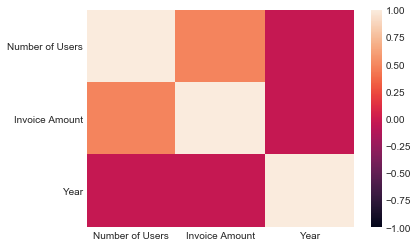

In [112]:
import seaborn as sns

sns.heatmap(correlation, vmin=-1, vmax=1);

In [113]:
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token) 

In [114]:
# Define Panel Visualization Functions
def Housing_Units_Per_Year():
    """Housing Units Per Year."""
    grp_yearly_income = yearly_income.groupby('Year').sum()
    grp_yearly_income['Invoice Amount'] = grp_yearly_income['Invoice Amount'] / 1000
    Fig_Housing_Units = grp_yearly_income.hvplot(
        y='Invoice Amount',
        figsize=(20,15), 
        kind='bar', 
        subplots=True, 
        title=('Total Sales by Year from 2015 to 2020'), 
        ylabel='Yearly Income (Tounsands of Dollars)', 
        xlabel='Total Number of Years',
        height=600,
        grid=True,
        width=1200).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 18, 'yticks': 20})
    return Fig_Housing_Units

def Average_Gross_Rent():
    """Average Gross Rent in San Francisco Per Year."""
    combined_income = grp_monthly_income_plt_3 * grp_monthly_income_plt
    return combined_income

def Average_Sales_Price():
    """Average Sales Price Per Year."""
    subscription_types = subscription_income.groupby(['Subscription']).sum()
    subscription_type = subscription_types.sort_values(by="Invoice Amount", ascending=False).head(10)
    subscription_type = subscription_type.reset_index()
    subscription_type['Invoice Amount'] = subscription_type['Invoice Amount'] / 1000
    Mean_Price_per_SQFT_Plot = subscription_type.hvplot.bar(
        x="Subscription", 
        y="Invoice Amount", 
        xlabel = "Subscription Types",
        ylabel = "Total Sales by Subscription (Tounsands of Dollars)",
        title="Total Income by Subscription Type from 2015 to 2020", 
        figsize=(20,15), 
        subplots=True, 
        height=800,
        grid=True,
        width=1400).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 18, 'yticks': 20})

    return Mean_Price_per_SQFT_Plot

def Average_Price_by_Neighborhood():
    """Average Prices by Neighborhood."""
    Group_Customers = new_customers.groupby(['Customers']).sum()
    TOP_10_Highest = Group_Customers.sort_values(by="Invoice Amount", ascending=False).head(10)
    TOP_10_Highest = TOP_10_Highest.reset_index()
# Plotting the data from the top 10 Highest Customers
    SFO_Grouped_Year_and_NBHD_Plot = TOP_10_Highest.hvplot.bar(
    x="Customers", 
    y="Invoice Amount", 
    xlabel = "Highest Paying Customers",
    ylabel = "Total Sales",
    title="Top 10 Highest Paying Customers of All Time", 
    figsize=(20,15), 
    subplots=True, 
    height=900,
    grid=True,
    rot=45,
    width=1400).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 18, 'yticks': 20})
    
    return SFO_Grouped_Year_and_NBHD_Plot

def TOP_Expensive_Neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    Group_Customers_2 = new_customers.groupby(['Customers']).sum()
    TOP_10_Lowest = Group_Customers_2.sort_values(by="Invoice Amount", ascending=True).head(10)
    TOP_10_Lowest = TOP_10_Lowest.reset_index()
# Plotting the data from the top 10 Lowest Customers
    TOP_10_Expensive_Plot = TOP_10_Lowest.hvplot.bar(
    x="Customers", 
    y="Invoice Amount", 
    xlabel = "Lowest Paying Customers",
    ylabel = "Total Sales",
    title="Top 10 Lowest Paying Customers of All Time", 
    figsize=(20,15), 
    subplots=True, 
    height=800,
    grid=True,
    rot=45,
    width=1400).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 18, 'yticks': 20})

    return TOP_10_Expensive_Plot

def TOP_Paying_Customers_State():
    # Highest Income by State
    top10payingstates = customers_states.reset_index().groupby("State").sum()["Invoice Amount"].nlargest(10)
    top10payingstates_plt = top10payingstates.hvplot.bar(
    title="Top 10 Highest Paying States of All Time", 
    xlabel="States", 
    ylabel="Total Invoiced ($)",
    figsize=(20,15), 
    subplots=True, 
    height=800,
    grid=True,
    width=1400).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 25, 'yticks': 20})
    
    return top10payingstates_plt

def TOP_Lowest_Paying_State():
    # Lowest Income by State
    top10lowpayingstates = customers_states.reset_index().groupby("State").sum()["Invoice Amount"].nsmallest(10)
    top10lowpayingstates_plt = top10lowpayingstates.hvplot.bar(
    title="Top 10 Lowest Paying States of All Time", 
    xlabel="States", 
    ylabel="Total Invoiced ($)",
    figsize=(20,15), 
    subplots=True, 
    height=800,
    grid=True,
    width=1400).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 25, 'yticks': 20})
    
    return top10lowpayingstates_plt

def Parallel_Coordinates():
    """Parallel Coordinates Plot."""
    Parallel = px.parallel_coordinates(parallel_look, color='Invoice Amount', title="Parallel View of Invoices along with Number of Users from 2015 to 2020")
    
    return Parallel

def Parallel_Categories():
    """Parallel Categories Plot."""
    Parallel_Category = px.parallel_categories(
    parallel_look,
    dimensions=["Customers Status", "Year", "Invoice Amount", "Number of Users"],
    title="Customers Status from 2015 to 2020 based on Most Loyal (Active), New Customers, and Lost Customers",
    color="Year",
    height=1400,
    color_continuous_scale=px.colors.sequential.Inferno,
)
    return Parallel_Category

def Dropdown_Plots():
    # Group by year and neighborhood and then create a new dataframe of the mean values
    SFO_Grouped_Year_and_NBHD = parallel_look_two.groupby(["Year", "State"])
# Use hvplot to create an interactive line chart of the average price per sq ft.
    AVG_Price_Mean = SFO_Grouped_Year_and_NBHD.mean()
    SFO_Grouped_Year_and_NBHD = AVG_Price_Mean.hvplot.bar(
    x='Year',
    y='Invoice Amount',
    xlabel='Year',
    ylabel='Total Sales',
    title='Interactive Line Chart of the Average Income by State',
    groupby='State',
    figsize=(20,15), 
    height=500,
    width=1000).opts(yformatter='$%.0f', fontsize={'title': 25, 'labels': 20, 'xticks': 20, 'yticks': 20})

    return SFO_Grouped_Year_and_NBHD

In [115]:

Housing_Units = pn.Column(
    Housing_Units_Per_Year(),
    Average_Gross_Rent(),
    Average_Sales_Price())

Housing_Avg = pn.Column(
    Average_Price_by_Neighborhood(),
    TOP_Expensive_Neighborhoods(),
    TOP_Paying_Customers_State(),
    TOP_Lowest_Paying_State())

Parallel_Plots = pn.Column(
    Parallel_Coordinates(),
    Parallel_Categories())

DropDown = pn.Column(
    Dropdown_Plots())

subscription_grouping = pn.Column(
    plt__atlas_grouped__year_subscription__mean.show(),
    plt__atlas_grouped__year_subscription__sum.show(),
    plt__atlas_grouped__year_subscription__count.show(),
    plt__atlas_grouped__year_subscription__nbrusers.show(),
    plt__atlas_grouped__year_subscription__count_1.show())

#Map_Plot = pn.Column(
#    Neighborhood_Map())

Dashboard = pn.Tabs(
#                ("Welcome", Map_Plot),
                ("Yearly Market Analysis", Housing_Units),
                ("Neighborhood Analysis", Housing_Avg),
                ("Parallel Plots", Parallel_Plots),
                ("Interactive Plotting", DropDown),
                ("Subscription Analysis", subscription_grouping))        
Dashboard

Tabs
    [0] Column
        [0] HoloViews(Bars)
        [1] HoloViews(Overlay)
        [2] HoloViews(Bars)
    [1] Column
        [0] HoloViews(Bars)
        [1] HoloViews(Bars)
        [2] HoloViews(Bars)
        [3] HoloViews(Bars)
    [2] Column
        [0] Plotly(Figure)
        [1] Plotly(Figure)
    [3] Column
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='State', options=['DC', 'KS', 'KY', ...], value='DC', width=250)
                [1] VSpacer()
    [4] Column
        [0] Str(None)
        [1] Str(None)
        [2] Str(None)
        [3] Str(None)
        [4] Str(None)

In [116]:
Dashboard

Tabs
    [0] Column
        [0] HoloViews(Bars)
        [1] HoloViews(Overlay)
        [2] HoloViews(Bars)
    [1] Column
        [0] HoloViews(Bars)
        [1] HoloViews(Bars)
        [2] HoloViews(Bars)
        [3] HoloViews(Bars)
    [2] Column
        [0] Plotly(Figure)
        [1] Plotly(Figure)
    [3] Column
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='State', options=['DC', 'KS', 'KY', ...], value='DC', width=250)
                [1] VSpacer()
    [4] Column
        [0] Str(None)
        [1] Str(None)
        [2] Str(None)
        [3] Str(None)
        [4] Str(None)

In [117]:

Dashboard.servable()

Tabs
    [0] Column
        [0] HoloViews(Bars)
        [1] HoloViews(Overlay)
        [2] HoloViews(Bars)
    [1] Column
        [0] HoloViews(Bars)
        [1] HoloViews(Bars)
        [2] HoloViews(Bars)
        [3] HoloViews(Bars)
    [2] Column
        [0] Plotly(Figure)
        [1] Plotly(Figure)
    [3] Column
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='State', options=['DC', 'KS', 'KY', ...], value='DC', width=250)
                [1] VSpacer()
    [4] Column
        [0] Str(None)
        [1] Str(None)
        [2] Str(None)
        [3] Str(None)
        [4] Str(None)